# Algorithms on graphs. Path search algorithms on weighted graphs

**Goal**

The use of path search algorithms on weighted graphs (Dijkstra's, A* and BellmanFord algorithms).

In [ ]:
!python3 -m pip install networkx

In [20]:
import random
import time
import statistics
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Dijkstra's and Bellman-Ford algorithms 

Generate a random adjacency matrix for a simple undirected weighted graph of
100 vertices and 500 edges with assigned random positive integer weights (note that
the matrix should be symmetric and contain only 0s and weights as elements).

In [12]:
# generate a random adjacency matrix 
# for a simple undirected weighted graph

NODES = 100
EDGES = 500

# generate random graph
G = nx.gnm_random_graph(NODES, EDGES, seed=246, directed=False)

# add random positive integer weights
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

# display
# G.edges.data()

Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random
starting vertex and other vertices.

In [40]:
# Dijkstra's Algorithm  to find shortest
# paths between a random starting vertex 
# and other vertices
def dijkstra_algorithm(graph, start, full_output=False):
    for each in list(graph.nodes):
        if each != start:
            result = nx.dijkstra_path(graph, start, each)
            if full_output: print(result)

# Bellman-Ford Algorithm  to find shortest
# paths between a random starting vertex 
# and other vertices
def bellman_ford(graph, start, full_output=False):
    for each in list(graph.nodes):
        if each != start:
            result = nx.bellman_ford_path(graph, start, each)
            if full_output: print(result)

Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex and calculate the average time required for the paths search of each algorithm.

In [29]:
def getAverageRunningTime(N, func, *args):
    ts = []
    for i in range(N):
        start = time.time()
        func(*args)
        end = round(time.time() - start, 3)
        ts.append(end)

    return print(statistics.mean(ts))

In [43]:
source = np.random.choice(G.nodes())
# dijkstra_algorithm(G, source, full_output=True)
# bellman_ford(G, source, full_output=True)

getAverageRunningTime(10, dijkstra_algorithm, G, source)
getAverageRunningTime(10, bellman_ford, G, source)


0.0157
0.0463


## A* algorithm

Generate a 10x20 cell grid with 40 obstacle cells. Choose two random nonobstacle cells and find a shortest path between them using A* algorithm. Repeat the experiment 5 times with different random pair of cells. Analyse the results obtained.

In [91]:
def getRandomNodeFromGrid(gr):
    random_index = random.randrange(len(gr.nodes()))
    return tuple(np.array(gr.nodes())[random_index]) 

def deleteNodesFromGrid(gr, nodes_num):
    if nodes_num > gr.number_of_nodes():
        return print("Number of nodes you are trying to delete \
            is greater than number of nodes in grid!")

    new_grid = gr.copy()
    for i in range(nodes_num):
        random_node = getRandomNodeFromGrid(new_grid)
        new_grid.remove_node(random_node)
        
    return new_grid

In [156]:
a = 10
b = 20
obstacles_num = 40

# generate a cell grid
grid = nx.grid_graph([a, b])
# create ${obstacles_num} of obstacles
grid = deleteNodesFromGrid(grid, obstacles_num)

print('Number of cells:', grid.number_of_nodes())

ts = []
for i in range(5):
    start = time.time()
    source, target = getRandomNodeFromGrid(grid), getRandomNodeFromGrid(grid)
    nx.astar_path(grid, source, target)
    end = round(time.time() - start, 3)
    ts.append(end)
print(statistics.mean(ts))
   

Number of cells: 160
0.0002


{(0, 0): Text(0, 0, '(0, 0)'),
 (0, 1): Text(1, 0, '(0, 1)'),
 (0, 2): Text(2, 0, '(0, 2)'),
 (0, 3): Text(3, 0, '(0, 3)'),
 (0, 4): Text(4, 0, '(0, 4)'),
 (0, 5): Text(5, 0, '(0, 5)'),
 (0, 6): Text(6, 0, '(0, 6)'),
 (0, 7): Text(7, 0, '(0, 7)'),
 (0, 8): Text(8, 0, '(0, 8)'),
 (0, 9): Text(9, 0, '(0, 9)'),
 (1, 0): Text(0, -1, '(1, 0)'),
 (1, 1): Text(1, -1, '(1, 1)'),
 (1, 2): Text(2, -1, '(1, 2)'),
 (1, 3): Text(3, -1, '(1, 3)'),
 (1, 4): Text(4, -1, '(1, 4)'),
 (1, 5): Text(5, -1, '(1, 5)'),
 (1, 6): Text(6, -1, '(1, 6)'),
 (1, 7): Text(7, -1, '(1, 7)'),
 (1, 8): Text(8, -1, '(1, 8)'),
 (1, 9): Text(9, -1, '(1, 9)'),
 (2, 1): Text(1, -2, '(2, 1)'),
 (2, 2): Text(2, -2, '(2, 2)'),
 (2, 3): Text(3, -2, '(2, 3)'),
 (2, 5): Text(5, -2, '(2, 5)'),
 (2, 6): Text(6, -2, '(2, 6)'),
 (2, 7): Text(7, -2, '(2, 7)'),
 (2, 8): Text(8, -2, '(2, 8)'),
 (2, 9): Text(9, -2, '(2, 9)'),
 (3, 1): Text(1, -3, '(3, 1)'),
 (3, 2): Text(2, -3, '(3, 2)'),
 (3, 3): Text(3, -3, '(3, 3)'),
 (3, 4): Text(4, -

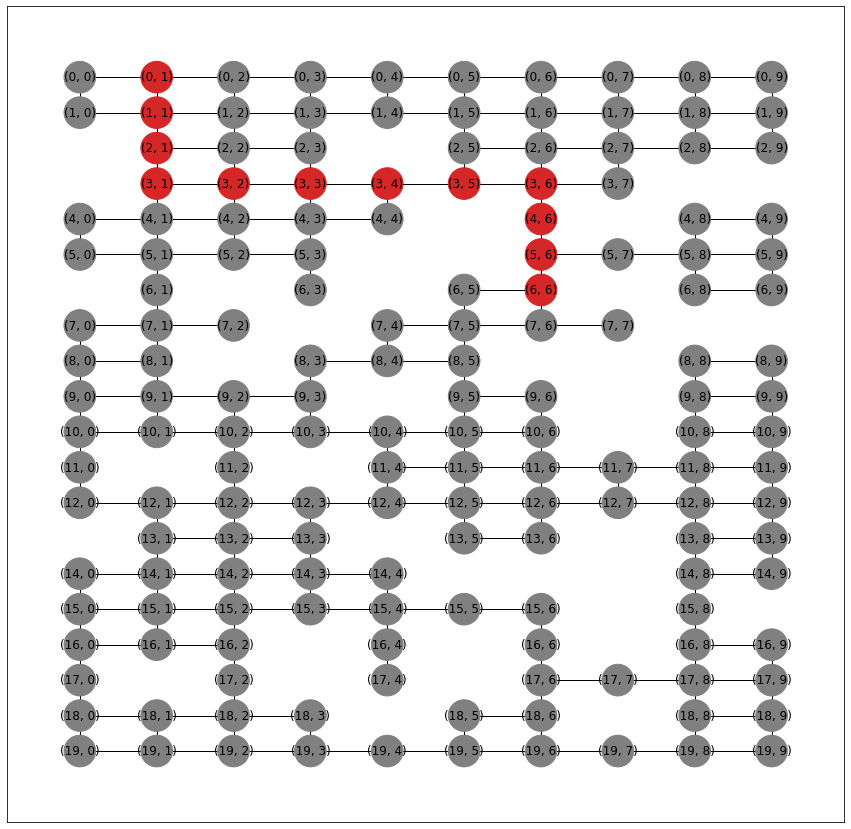

In [171]:
start, end = getRandomNodeFromGrid(grid), getRandomNodeFromGrid(grid)
shortestPath = nx.astar_path(grid, start, end)

pos = {(x,y):(y,-x) for x,y in grid.nodes()}
options = {"node_size": 1000}
node_colors = ["tab:red" if n in shortestPath else "gray" for n in grid.nodes()]

plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(grid, 
                        pos=pos, 
                        node_color=node_colors,
                        **options)
nx.draw_networkx_edges(grid, pos=pos)
nx.draw_networkx_labels(grid,pos)